In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from datetime import date
from datetime import datetime
import calendar
import pickle

In [81]:
df = pd.read_csv('data/combined_data.csv')
df.shape

#Preprocess by filling in 0's for NaN's (blanks)
df.fillna(0, inplace=True)


df2 = df.rename(columns={'Date (LT)': 'Datetime', 'Raw Conc.': 'Conc'})
#, index={'ONE': 'one'}
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df2[0:1200] 
test=df2[1200:]
train.tail(50)
test.head()
train.head()
test.tail()


,Unnamed: 0,Datetime,Conc,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
1606,1606,2020-01-18 14:00:00,67.0,73.0,57.0,57.0,0.0,0.0,0.0,29.93,0.0,1.0
1607,1607,2020-01-18 15:00:00,53.0,72.0,55.0,57.0,0.0,0.0,0.0,29.93,0.0,1.0
1608,1608,2020-01-18 16:00:00,56.0,72.0,57.0,60.0,0.0,0.0,0.0,29.93,0.0,1.0
1609,1609,2020-01-18 17:00:00,63.0,72.0,57.0,60.0,0.0,0.0,0.0,29.93,0.0,1.0
1610,1610,2020-01-18 18:00:00,61.0,68.0,57.0,68.0,0.0,0.0,0.0,29.93,0.0,1.0


In [43]:
test.head(50)

,Unnamed: 0,Datetime,Conc,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
1200,1200,2020-01-01 04:00:00,219.0,64.0,57.0,77.0,90.0,6.0,0.0,30.13,0.0,2.0
1201,1201,2020-01-01 05:00:00,160.0,68.0,57.0,68.0,90.0,3.0,0.0,30.10,0.0,1.0
1202,1202,2020-01-01 06:00:00,158.0,72.0,57.0,60.0,157.5,5.0,0.0,30.10,0.0,1.0
1203,1203,2020-01-01 07:00:00,176.0,73.0,59.0,61.0,135.0,7.0,0.0,30.04,0.0,1.0
1204,1204,2020-01-01 08:00:00,203.0,75.0,59.0,57.0,112.5,7.0,0.0,30.01,0.0,1.0
1205,1205,2020-01-01 09:00:00,255.0,75.0,59.0,57.0,157.5,5.0,0.0,30.01,0.0,1.0
1206,1206,2020-01-01 10:00:00,193.0,75.0,59.0,57.0,135.0,3.0,0.0,29.98,0.0,1.0
1207,1207,2020-01-01 11:00:00,146.0,73.0,59.0,61.0,135.0,3.0,0.0,30.01,0.0,1.0
1208,1208,2020-01-01 12:00:00,135.0,72.0,59.0,64.0,135.0,3.0,0.0,30.01,0.0,1.0
1209,1209,2020-01-01 13:00:00,109.0,68.0,59.0,73.0,0.0,0.0,0.0,30.04,0.0,1.0


In [44]:
#Aggregating the dataset at daily level
df2.Timestamp = pd.to_datetime(df2.Datetime,format='%Y-%m-%d %H:%M') 
df2.index = df2.Timestamp 
df2.head()
df2 = df2.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%Y-%m-%d %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%Y-%m-%d %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\shuvr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\shuvr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\shuvr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


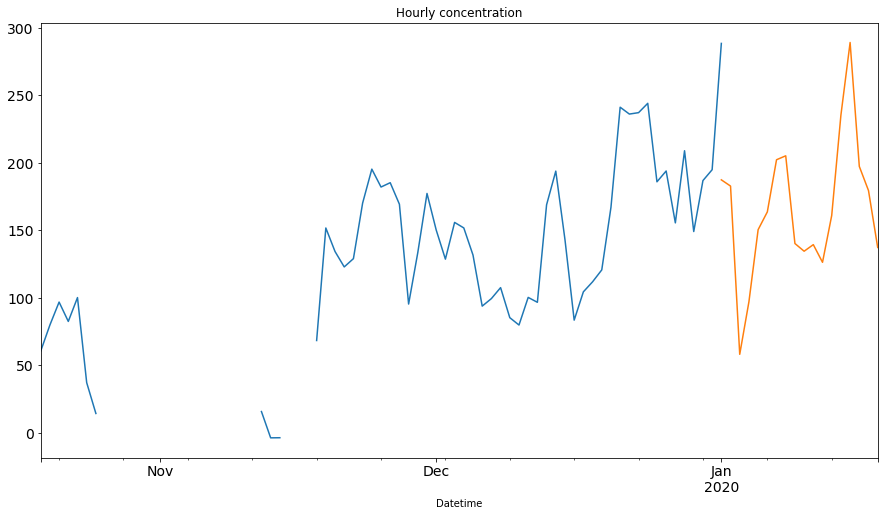

In [46]:
#Plotting data
train.Conc.plot(figsize=(15,8), title= 'Hourly concentration', fontsize=14)
test.Conc.plot(figsize=(15,8), title= 'Hourly concentration', fontsize=14)
plt.show()
#plt.show()

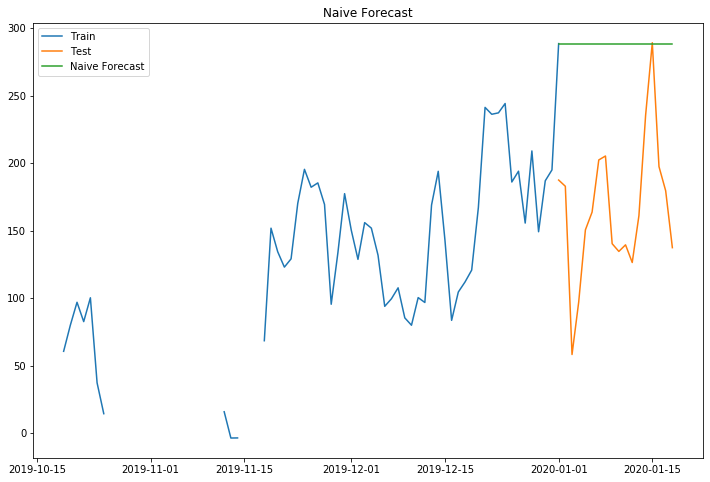

In [60]:
#Naive

dd= np.asarray(train.Conc)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Conc'], label='Train')
plt.plot(test.index,test['Conc'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [62]:
#Naive RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Conc, y_hat.naive))
print(rms)

132.54212131839836


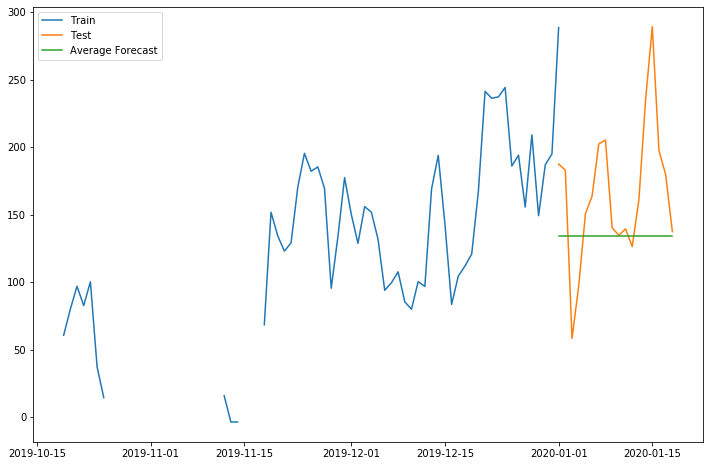

In [64]:
#Average

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Conc'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Conc'], label='Train')
plt.plot(test['Conc'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [66]:

#Average RMSE

rms = sqrt(mean_squared_error(test.Conc, y_hat_avg.avg_forecast))
print(rms)

59.650550872468315


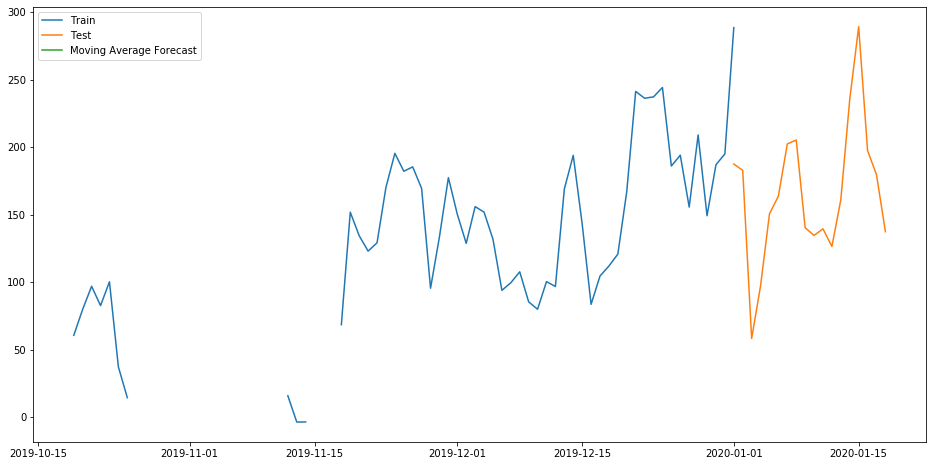

In [68]:
# Moving average

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Conc'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Conc'], label='Train')
plt.plot(test['Conc'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [69]:
# Moving Average RMSE
rms = sqrt(mean_squared_error(test.Conc, y_hat_avg.moving_avg_forecast))
print(rms)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

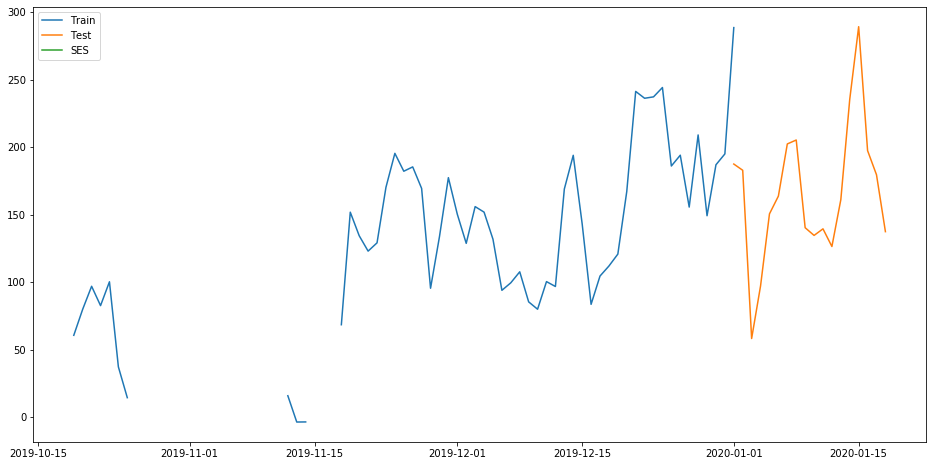

In [70]:
# Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Conc'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Conc'], label='Train')
plt.plot(test['Conc'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [71]:
rms = sqrt(mean_squared_error(test.Conc, y_hat_avg.SES))
print(rms)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [73]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Conc).plot()
result = sm.tsa.stattools.adfuller(train.Conc)
plt.show()


ValueError: This function does not handle missing values

C:\Users\shuvr\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


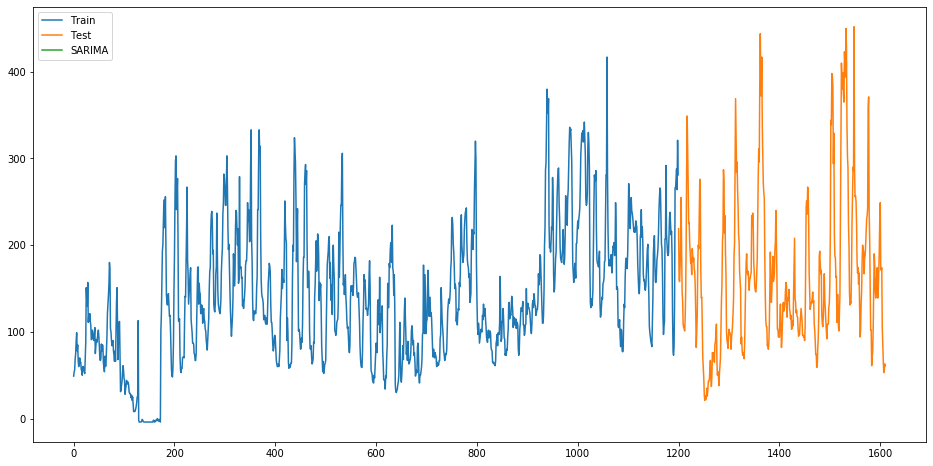

In [84]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Conc, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
#y_hat_avg['SARIMA'] = fit1.predict(start="2019-10-20", end="2020-01-17", dynamic=True)
#y_hat_avg['SARIMA'] = fit1.predict(start="10", end="500", dynamic=True)
y_hat_avg['SARIMA'] = fit1.predict(dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Conc'], label='Train')
plt.plot(test['Conc'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [88]:
rms = sqrt(mean_squared_error(test.Conc, y_hat_avg.SARIMA))
print(rms)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [87]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

ImportError: cannot import name 'easter' from 'holidays' (C:\Users\shuvr\Anaconda3\lib\site-packages\holidays\__init__.py)